In [1871]:
import pandas as pd
import numpy as np 

#visilation

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns 

#models

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error,classification_report,precision_score,recall_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [1872]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [1873]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [1874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [1875]:
aykiriDegerler=[]
def find_outliers_IQR(df):
    for x in df.columns:
        q1=df[x].quantile(0.25)
        q3=df[x].quantile(0.75)
        IQR=q3-q1
        outliers = df[((df[x]<(q1-1.5*IQR)) | (df[x]>(q3+1.5*IQR)))].index.tolist()
        aykiriDegerler.append({"columns":x,"aykiriDeger":outliers})
    
   
    return aykiriDegerler

In [1876]:
aykiriDegerList=find_outliers_IQR(df)

In [1877]:
for item in aykiriDegerList:
    column_name = item["columns"]
    outliers = item["aykiriDeger"]
    print(f"Sütun: {column_name}")
    print(f"Aykırı Değerler: {outliers}")


Sütun: CRIM
Aykırı Değerler: [367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]
Sütun: ZN
Aykırı Değerler: [39, 40, 54, 55, 56, 57, 65, 66, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 254, 255, 256, 274, 275, 276, 277, 278, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 331, 332, 341, 343, 344, 347, 348, 349, 350, 351, 352, 353, 354, 355]
Sütun: INDUS
Aykırı Değerler: []
Sütun: CHAS
Aykırı Değerler: [142, 152, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212, 216, 218, 219, 220, 221, 222, 234, 236, 269, 273, 274, 276, 277, 282, 283, 356, 357, 358, 363, 364, 369, 370, 372]
Sütun: NOX
Aykırı Değerler: []
Sütun: RM
A

Aykiri degerleri bulup listeledim

In [1878]:
fig=make_subplots(rows=3,cols=3)

fig.add_trace(go.Box(y=df["CRIM"].values , name= "Crim", marker_color="white"),row=1,col=1)
fig.add_trace(go.Box(y=df["ZN"].values , name= "Zn", marker_color="white"),row=1,col=2)
fig.add_trace(go.Box(y=df["CHAS"].values , name= "CHAS", marker_color="white"),row=1,col=3)
fig.add_trace(go.Box(y=df["RM"].values , name= "RM", marker_color="white"),row=2,col=1)
fig.add_trace(go.Box(y=df["DIS"].values , name= "DIS", marker_color="white"),row=2,col=2)
fig.add_trace(go.Box(y=df["PTRATIO"].values , name= "PTRATIO", marker_color="white"),row=2,col=3)
fig.add_trace(go.Box(y=df["B"].values , name= "B", marker_color="white"),row=3,col=1)
fig.add_trace(go.Box(y=df["LSTAT"].values , name= "LSTAT", marker_color="white"),row=3,col=2)
fig.add_trace(go.Box(y=df["MEDV"].values , name= "MEDV", marker_color="white"),row=3,col=3)

fig.update_layout(
    title="Aykiri degerlerin Box tablosu ",
    template="plotly_dark"
)
fig.show()







In [1879]:
CRIM=df["CRIM"].value_counts()
ZN=df["ZN"].value_counts()
RM=df["RM"].value_counts()
CHAS=df["CHAS"].value_counts()
DIS=df["DIS"].value_counts()
PTRATIO=df["PTRATIO"].value_counts()
B=df["B"].value_counts()
LSTAT=df["LSTAT"].value_counts()
MEDV=df["MEDV"].value_counts()

In [1880]:
fig=make_subplots(rows=3,cols=3)

fig.add_trace(go.Histogram(x=CRIM.index,y=CRIM.values , name= "Crim", marker_color="white"),row=1,col=1)
fig.add_trace(go.Histogram(x=ZN.index,y=ZN.values, name= "Zn", marker_color="white"),row=1,col=2)
fig.add_trace(go.Bar(x=CHAS.index,y=CHAS.values , name= "CHAS", marker_color="white"),row=1,col=3)
fig.add_trace(go.Histogram(x=RM.index,y=RM.values , name= "RM", marker_color="white"),row=2,col=1)
fig.add_trace(go.Histogram(x=DIS.index,y=DIS.values , name= "DIS", marker_color="white"),row=2,col=2)
fig.add_trace(go.Bar(x=PTRATIO.index,y=PTRATIO.values, name= "PTRATIO", marker_color="white"),row=2,col=3)
fig.add_trace(go.Histogram(x=B.index,y=B.values , name= "B", marker_color="white"),row=3,col=1)
fig.add_trace(go.Histogram(x=LSTAT.index,y=LSTAT.values, name= "LSTAT", marker_color="white"),row=3,col=2)
fig.add_trace(go.Histogram(x=MEDV.index,y=MEDV.values , name= "MEDV", marker_color="white"),row=3,col=3)

fig.update_layout(
    title="Aykiri degerlerin Bar tablosu ",
    template="plotly_dark"
)
fig.show()


In [1881]:
df["B"].value_counts()

B
396.90    121
393.74      3
395.24      3
376.14      2
394.72      2
         ... 
240.16      1
389.61      1
374.43      1
338.92      1
391.99      1
Name: count, Length: 357, dtype: int64

baktigimda PTRATIO gibi sutunlarin bir degeri fazla oldugu icin median q1 ve q3 u bozuyor o yuzden aykiri olmuyor aykiri olarak Crim Dis ve LSTAT olarak belirledim B de olabilir dedim ama ondada bir degerden 121 tane oldugu icin q1 ve q3 duzgun degil diye dusunuyorum

In [1882]:
df = df[df["CRIM"] <= 28]
df=df[df["DIS"]<=10]
df=df[df["LSTAT"]<=32]
df=df[df["NOX"]<0.80]


veri setimden bu satirlari cikarmayi uygun buldum yukardaki gorsellestirdigim verilere bakarak

In [1883]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [1884]:
fig=make_subplots(rows=3,cols=3)

fig.add_trace(go.Box(y=df["CRIM"].values , name= "Crim", marker_color="white"),row=1,col=1)
fig.add_trace(go.Box(y=df["ZN"].values , name= "Zn", marker_color="white"),row=1,col=2)
fig.add_trace(go.Box(y=df["CHAS"].values , name= "CHAS", marker_color="white"),row=1,col=3)
fig.add_trace(go.Box(y=df["RM"].values , name= "RM", marker_color="white"),row=2,col=1)
fig.add_trace(go.Box(y=df["DIS"].values , name= "DIS", marker_color="white"),row=2,col=2)
fig.add_trace(go.Box(y=df["PTRATIO"].values , name= "PTRATIO", marker_color="white"),row=2,col=3)
fig.add_trace(go.Box(y=df["B"].values , name= "B", marker_color="white"),row=3,col=1)
fig.add_trace(go.Box(y=df["LSTAT"].values , name= "LSTAT", marker_color="white"),row=3,col=2)
fig.add_trace(go.Box(y=df["MEDV"].values , name= "MEDV", marker_color="white"),row=3,col=3)

fig.update_layout(
    title="Aykiri degerlerin Box tablosu ",
    template="plotly_dark"
)
fig.show()



In [1885]:
INDUS=df["INDUS"].value_counts()
NOX=df["NOX"].value_counts()
AGE=df["AGE"].value_counts()
RAD=df["RAD"].value_counts()
TAX=df["TAX"].value_counts()


In [1886]:
fig=make_subplots(rows=2,cols=3)

fig.add_trace(go.Histogram(x=INDUS.index,y=INDUS.values , name= "INDUS", marker_color="white"),row=1,col=1)
fig.add_trace(go.Bar(x=NOX.index,y=NOX.values, name= "NOX", marker_color="white"),row=1,col=2)
fig.add_trace(go.Histogram(x=AGE.index,y=AGE.values , name= "AGE", marker_color="white"),row=1,col=3)
fig.add_trace(go.Bar(x=RAD.index,y=RAD.values , name= "RAD", marker_color="white"),row=2,col=1)
fig.add_trace(go.Bar(x=TAX.index,y=TAX.values , name= "TAX", marker_color="white"),row=2,col=2)

fig.update_layout(
    title="Aykiri olmayan degerlerin Bar tablosu ",
    template="plotly_dark"
)
fig.show()

In [1887]:
df["TAX"].value_counts()

TAX
666.0    119
307.0     40
437.0     14
403.0     14
304.0     14
        ... 
280.0      1
226.0      1
244.0      1
313.0      1
285.0      1
Name: count, Length: 63, dtype: int64

<Axes: >

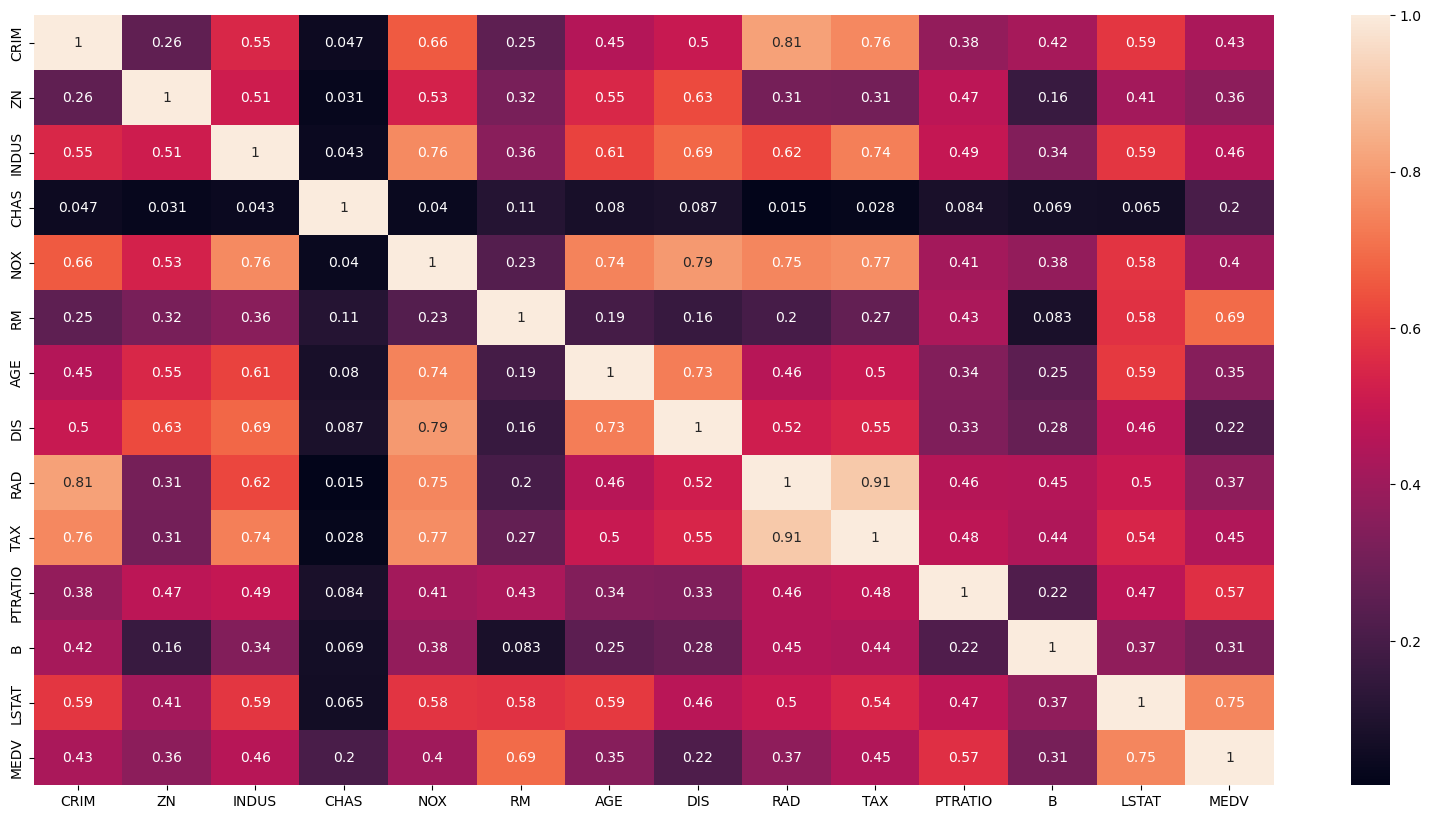

In [1888]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

Burdan chas haric hepsini alacagim

# ev fiyatlari ile sutunlari karsilastirma 


In [1889]:
lstatAndMedv=df.groupby("MEDV")["LSTAT"].mean().sort_values(ascending=False)
lstatAndMedv

MEDV
7.4     31.99
14.4    30.81
8.8     30.63
6.3     29.97
8.1     29.68
        ...  
44.0     3.11
42.3     3.11
46.0     3.01
36.4     2.87
41.7     2.47
Name: LSTAT, Length: 224, dtype: float64

In [1890]:
fig=px.bar(
    x=lstatAndMedv.index,
    y=lstatAndMedv.values,
    color=lstatAndMedv.values,
    text=lstatAndMedv.values
    
)
fig.update_traces(width=0.05)
fig.update_layout(
    title="Lstat And Medv",
    xaxis=dict(
        title="Medv mean"
    ),
     yaxis=dict(
        title="LSTAT"
    )
    
)
fig.show()

In [1891]:
PTRATIOAndMedv=df.groupby("MEDV")["PTRATIO"].mean().sort_values(ascending=False)

In [1892]:
fig=px.bar(
    x=PTRATIOAndMedv.index,
    y=PTRATIOAndMedv.values,
    color=PTRATIOAndMedv.values,
    text=np.round(PTRATIOAndMedv.values,3),
    color_continuous_scale="OrRd"
    
    
)
fig.update_layout(
    title="PTRATIO And Medv",
    template="plotly_dark",
   
    
    xaxis=dict(
        title="Medv mean"
    ),
     yaxis=dict(
        title="PTRATIO"
    )
)
fig.show()

In [1893]:
RMAndMedv=df.groupby("MEDV")["RM"].mean().sort_values(ascending=False)
RMAndMedv

MEDV
48.8    8.398
41.7    8.337
44.8    8.266
42.8    8.259
48.3    8.247
        ...  
8.1     5.093
11.9    5.084
9.7     5.036
7.4     5.000
8.8     4.368
Name: RM, Length: 224, dtype: float64

In [1894]:
fig=px.bar(
    x=RMAndMedv.index,
    y=RMAndMedv.values,
    color=RMAndMedv.values,
    text=np.round(RMAndMedv.values,3),
    color_continuous_scale="OrRd"
    
    
)
fig.update_traces(width=0.07)

fig.update_layout(
    title="RM And Medv",
    template="plotly_dark",
   
    
    xaxis=dict(
        title="Medv mean"
    ),
     yaxis=dict(
        title="RM"
    )
)
fig.show()


In [1895]:
TaxAndMedv=df.groupby("TAX")["MEDV"].mean().sort_values(ascending=False)
TaxAndMedv

TAX
198.0    50.000000
255.0    50.000000
244.0    44.000000
216.0    38.980000
264.0    38.025000
           ...    
352.0    17.350000
437.0    17.285714
666.0    17.012605
422.0    16.500000
711.0    12.800000
Name: MEDV, Length: 63, dtype: float64

In [1896]:
fig=px.bar(
    x=TaxAndMedv.index,
    y=TaxAndMedv.values,
    color=TaxAndMedv.values,
    text=np.round(TaxAndMedv.values,3),
    color_continuous_scale="OrRd"
    
    
)
fig.update_traces(width=1)

fig.update_layout(
    title="TAX And Medv",
    template="plotly_dark",
   
    
    xaxis=dict(
        title="TAX"
    ),
     yaxis=dict(
        title="Medv mean"
    )
)
fig.show()


# Model

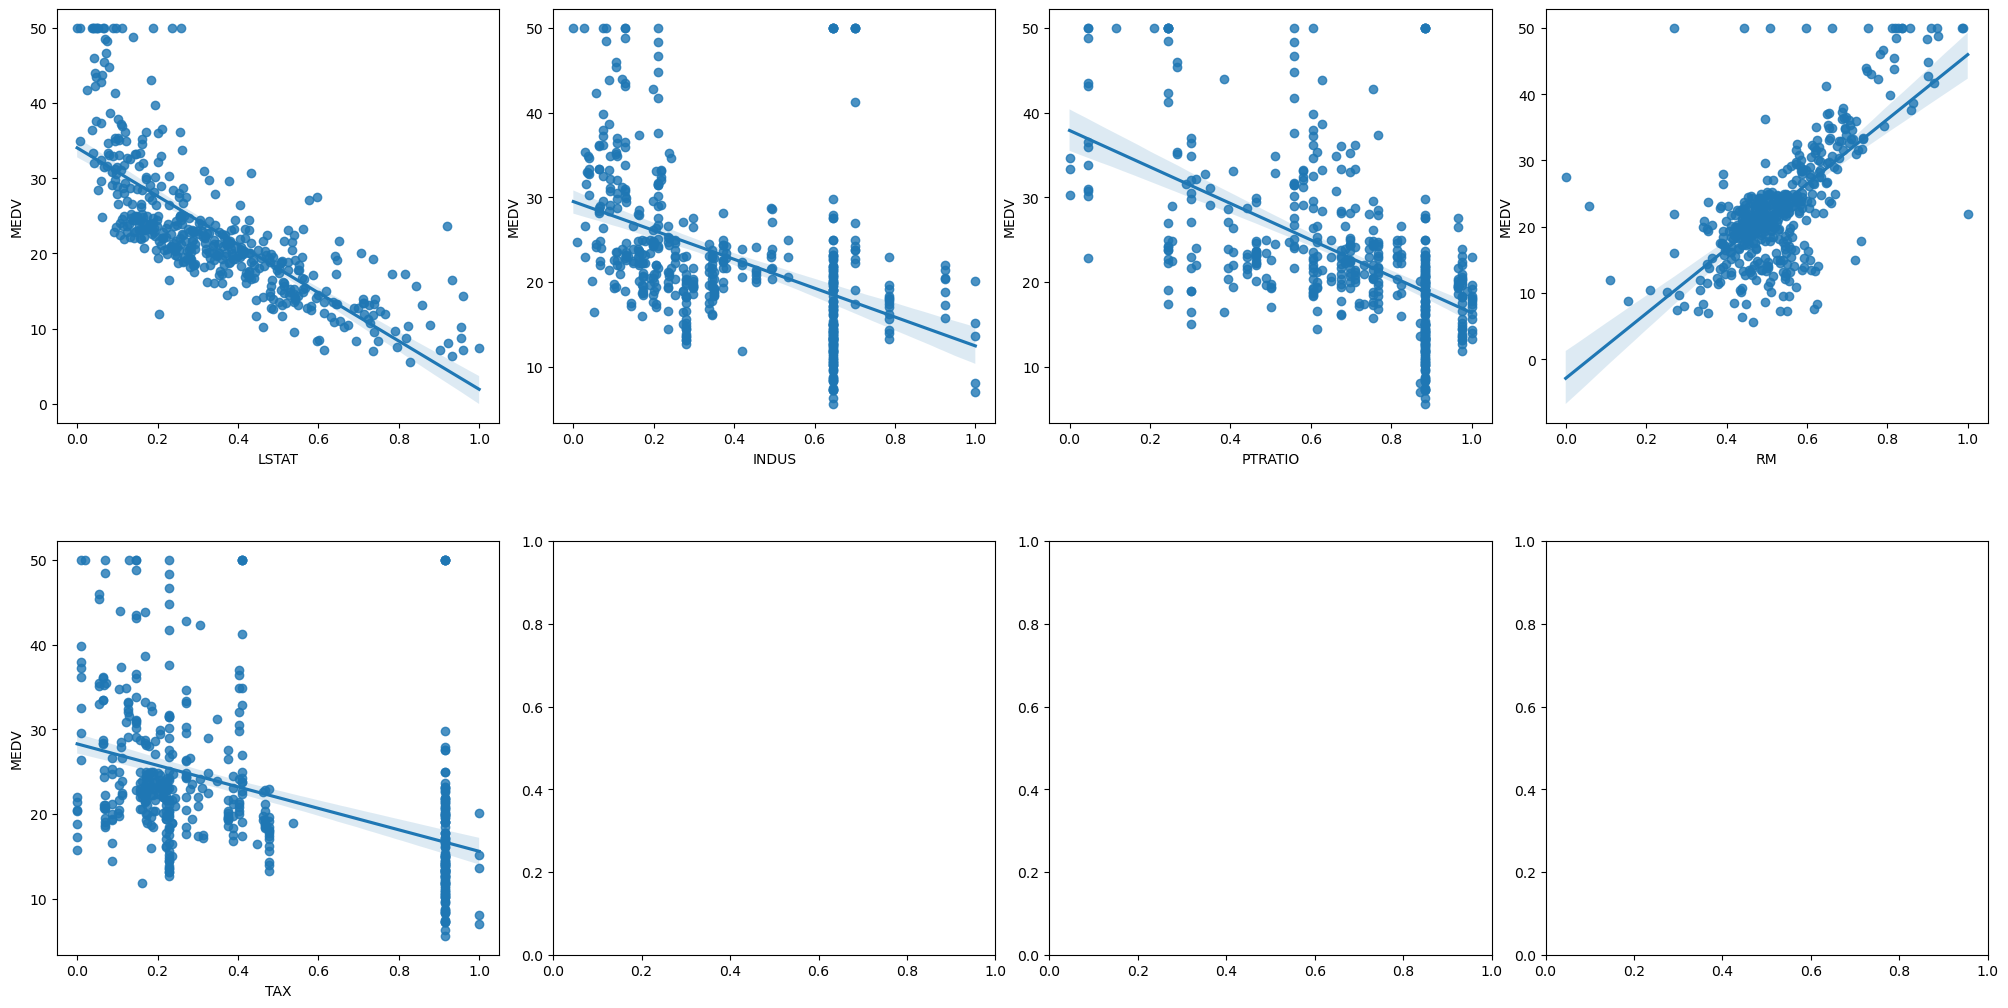

In [1897]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'PTRATIO', 'RM', 'TAX']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [1898]:
#dfNew=df.drop(["CRIM","NOX","ZN","CHAS","AGE","DIS","RAD","B"],axis=1)


In [1930]:
dfNew=df.drop("CHAS",axis=1)


In [1931]:
for col in dfNew.columns:
    if np.abs(dfNew[col].skew()) > 0.3:
        dfNew[col] = np.log1p(dfNew[col])


In [1932]:
dfNew

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,1.196948,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421,3.218876
1,0.026944,0.000000,2.088153,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488,3.117950
2,0.026924,0.000000,2.088153,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420,3.575151
3,0.031857,0.000000,1.156881,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181,3.538057
4,0.066770,0.000000,1.156881,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.000000,2.559550,0.452985,2.027227,4.249923,1.246630,0.693147,5.613128,3.091042,5.973784,2.367436,3.152736
502,0.044275,0.000000,2.559550,0.452985,1.962908,4.352855,1.190127,0.693147,5.613128,3.091042,5.986201,2.310553,3.072693
503,0.058986,0.000000,2.559550,0.452985,2.076437,4.521789,1.152943,0.693147,5.613128,3.091042,5.986201,1.893112,3.214868
504,0.103991,0.000000,2.559550,0.452985,2.053354,4.503137,1.220505,0.693147,5.613128,3.091042,5.977492,2.012233,3.135494


In [1933]:
train=dfNew.drop("MEDV",axis=1)
test=dfNew.loc[:,"MEDV"]
trainx,testx,trainy,testy=train_test_split(train,test,test_size=0.2,random_state=42)

In [1934]:
linearRegression=LinearRegression()
linearRegression.fit(trainx,trainy)
predictRegression=linearRegression.predict(testx)
dogrulukOrani=np.sqrt(mean_squared_error(predictRegression,testy))

In [1935]:
dogrulukOrani

0.1439585013198492

In [1936]:
ridge=Ridge()
grid_model = GridSearchCV(ridge, param_grid={'alpha':[0.05, 0.1, 1,2,3,4, 5, 8, 10, 12, 15, 20]}, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(trainx,trainy)

best_ridge = grid_model.best_estimator_
print(best_ridge)



Ridge(alpha=0.1)


In [1937]:
ridge=Ridge(alpha=0.1)
ridge.fit(trainx,trainy)
predictRidge=ridge.predict(testx)
dogrulukOraniRidge=np.sqrt(mean_squared_error(testy,predictRidge))

In [1938]:
dogrulukOraniRidge

0.14376259484197051

In [1939]:
gripRidgepredict=grid_model.predict(testx)
np.sqrt(mean_squared_error(testy,gripRidgepredict))

0.14376259484197051

In [1992]:
agac=RandomForestRegressor(random_state=42)

grid_modelAgac = GridSearchCV(agac, param_grid={'n_estimators':[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}, scoring='neg_mean_squared_error', cv=5)
grid_modelAgac.fit(trainx,trainy)
best_estimator = grid_modelAgac.best_estimator_
print(best_estimator)

RandomForestRegressor(n_estimators=90, random_state=42)


In [1964]:
agac=RandomForestRegressor(n_estimators=60,random_state=42)
agac.fit(trainx,trainy)
predictAgac=agac.predict(testx)
dogrulukOraniAgac=np.sqrt(mean_squared_error(testy,predictAgac))
gridpredictAgac=np.round(grid_modelAgac.predict(testx),6)
np.sqrt(mean_squared_error(testy,gridpredict))

0.1260823686881728

In [1965]:
gridpredictAgac

array([3.555253, 3.22818 , 2.775362, 3.427457, 2.813616, 3.08941 ,
       3.490468, 3.01452 , 2.597578, 3.227059, 3.074702, 2.52755 ,
       2.827498, 3.06596 , 3.079136, 2.826362, 3.131776, 3.232248,
       3.008653, 3.131258, 3.351425, 3.158446, 3.081864, 3.558223,
       3.085257, 3.724573, 2.799649, 3.161124, 2.774098, 3.461875,
       3.027947, 3.070613, 3.312429, 2.682216, 2.999358, 3.364002,
       2.572848, 3.082936, 3.138478, 2.616943, 3.28211 , 3.163412,
       3.145007, 3.485182, 3.308345, 3.049428, 3.241406, 3.20014 ,
       3.16021 , 3.012353, 2.766889, 3.124587, 3.204055, 2.793394,
       3.157925, 3.016425, 3.11213 , 2.981311, 3.284952, 3.156441,
       3.095466, 3.122441, 3.08575 , 3.598986, 3.188107, 3.205973,
       3.14344 , 2.418942, 3.520536, 2.270298, 3.544444, 3.07081 ,
       3.105675, 2.46737 , 3.034423, 2.404522, 3.215249, 3.161803,
       3.363452, 2.772192, 3.080893, 3.17797 , 3.046424, 2.802071,
       2.834311, 2.75567 , 2.758622, 3.06802 , 3.239227, 3.016

In [1966]:
dogrulukOraniAgac

0.12553713385043777

In [1967]:
Knregression=KNeighborsRegressor()
Knregression.fit(trainx,trainy)
predictKNregression=Knregression.predict(testx)
dogrulukOraniKnregression=np.sqrt(mean_squared_error(testy,predictKNregression))

In [1968]:
dogrulukOraniKnregression

0.1634820556076856

In [1969]:
grid_modelKn= GridSearchCV(Knregression, param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}, scoring='neg_mean_squared_error', cv=5)
grid_modelKn.fit(trainx,trainy)
best_n_neighbors = grid_modelKn.n_neighbors
print(best_n_neighbors)

KNeighborsRegressor(n_neighbors=3)


In [1970]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe=Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=2))
])

pipe.fit(trainx,trainy)
predictKNregression=np.round(pipe.predict(testx),6)
dogrulukOraniKnregression=np.sqrt(mean_squared_error(testy,predictKNregression))

In [1971]:
dogrulukOraniKnregression

0.14807357186061554

In [1972]:
gripKNpredict=grid_model.predict(testx)
np.sqrt(mean_squared_error(testy,gripKNpredict))

0.15475797134004762

In [1973]:
testy

55     3.594569
73     3.194583
33     2.646175
481    3.206803
460    2.856470
         ...   
137    2.895912
131    3.025291
432    2.839078
338    3.072693
449    2.639057
Name: MEDV, Length: 95, dtype: float64

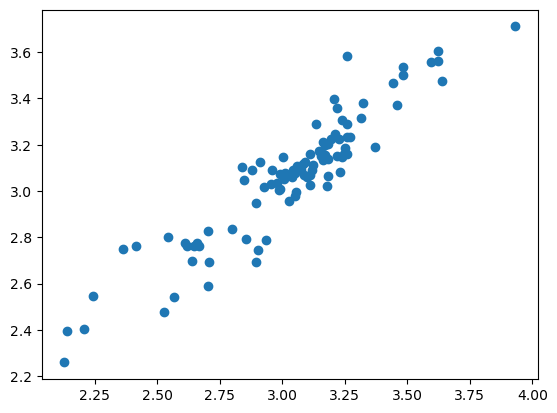

In [1974]:
plt.scatter(testy,predictAgac)

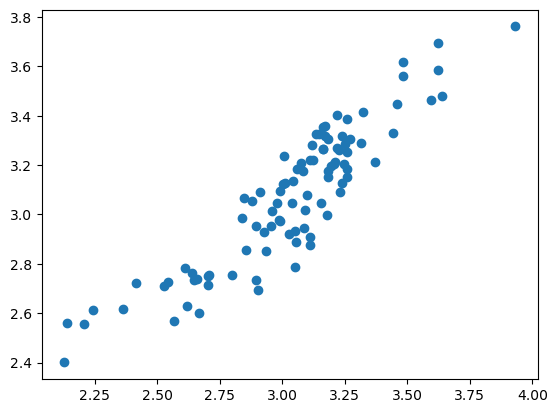

In [1975]:
plt.scatter(testy,predictRegression)

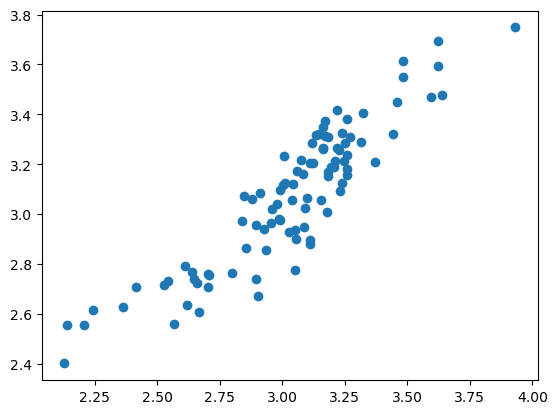

In [1976]:
plt.scatter(testy,predictRidge)

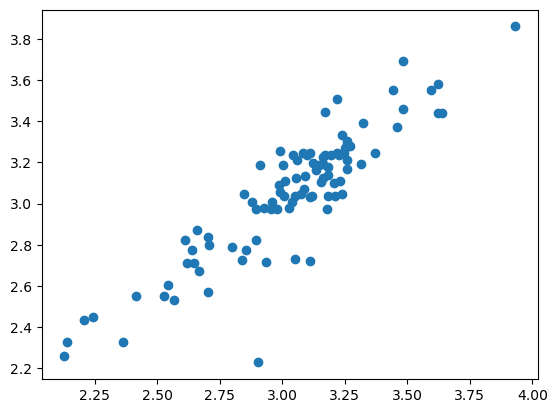

In [1977]:
plt.scatter(testy,predictKNregression)